# Data processing with pandas

## Categorical variables with pd.cat

In [3]:
import pandas as pd 
import numpy as np 
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['target'] = pd.Series(iris['target_names'][iris['target']], dtype="category")
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
print("Integer representation: ", iris_df['target'].cat.codes)
print("Use .values to get numpy array: ", iris_df['target'].cat.codes.values)
print("Different categories: ", iris_df['target'].cat.categories)

Integer representation:  0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8
Use .values to get numpy array:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Different categories:  Index(['setosa', 'versicolor', 'virginica'], dtype='object')


In [24]:
iris_df['target'].cat.codes.values.dtype

dtype('int8')

## One hot encoding with pandas throug get_dummies!

In [26]:
extended_df = pd.concat((iris_df, pd.get_dummies(iris_df['target'], dtype=float)), axis=1)
extended_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0


pd.get_dummies skips over numerical features, making the process even easier:

In [31]:
pd.get_dummies(iris_df, dtype=float).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_setosa,target_versicolor,target_virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [4]:
from ucimlrepo import fetch_ucirepo 
wine = fetch_ucirepo(id=109) 
wine_df = pd.concat((wine.data.targets.astype("category"), wine.data.features), axis=1)
wine_df.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('class', axis=1).values, wine_df['class'].values)

In [23]:
X_train.shape, y_train.shape

((133, 13), (133,))

## Train a random forest, which should get a good accuracy without any preprocessing:

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25,
                                random_state=1,
                                n_jobs=5) # run 5 in parallel
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Accuracy: ", (y_pred == y_test).mean())

Accuracy:  0.9777777777777777


 1) Flavanoids                     0.169372
 2) Color_intensity                0.165472
 3) Proline                        0.154695
 4) Alcohol                        0.154379
 5) 0D280_0D315_of_diluted_wines   0.113512
 6) Total_phenols                  0.064238
 7) Hue                            0.053873
 8) Malicacid                      0.029683
 9) Magnesium                      0.026974
10) Alcalinity_of_ash              0.025852
11) Proanthocyanins                0.022219
12) Ash                            0.010077
13) Nonflavanoid_phenols           0.009654


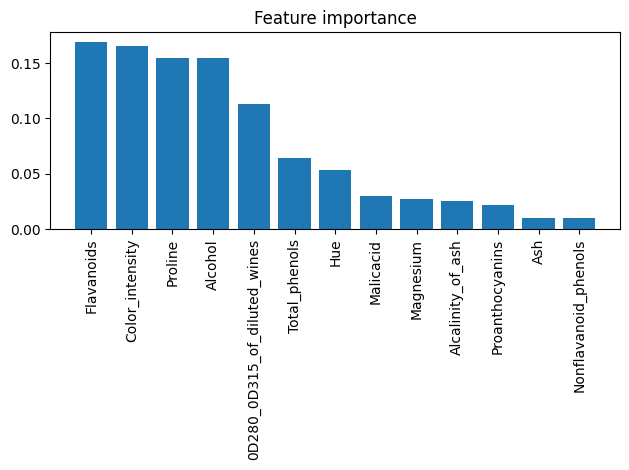

In [28]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
feat_labels = wine_df.columns[1:]
forest = RandomForestClassifier(n_estimators=50, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()